In [70]:
# Importar la librería yfinance para descargar datos financieros
import yfinance as yf

# Definir una función para obtener datos históricos de un símbolo específico
def get_data(symbol: str):
    # Descargar datos del símbolo dado, para un periodo de 182 días con intervalo diario
    datos = yf.download(symbol, period='6mo', interval='1d')
    # Reiniciar el índice del DataFrame y eliminar el índice anterior
    datos.reset_index(inplace=True, drop=True)
    # Retornar el DataFrame con los datos
    return datos

# Obtener datos para el símbolo NVDA (NVIDIA Corporation)
datos = get_data("NVDA")


[*********************100%%**********************]  1 of 1 completed


In [71]:
datos

,Open,High,Low,Close,Adj Close,Volume
0,47.766998,48.500000,47.507999,47.998001,47.991810,306535000
1,48.462002,49.547001,48.306000,49.097000,49.090664,415039000
2,49.512001,52.275002,49.479000,52.252998,52.246254,642510000
3,52.401001,54.325001,51.689999,53.139999,53.133144,773100000
4,53.616001,54.599998,53.488998,54.349998,54.342987,533796000
...,...,...,...,...,...,...
120,124.099998,126.410004,122.919998,123.989998,123.989998,252571700
121,124.580002,127.709999,122.750000,123.540001,123.540001,315516700
122,123.470001,124.839996,118.830002,124.300003,124.300003,284885500
123,121.129997,123.410004,121.029999,122.669998,122.669998,218374000


In [72]:

import pandas_ta as ta

# Definir una función para calcular la media móvil simple (SMA) de una serie de datos
def calculo_sma(datos, length: int):
    # Calcular la SMA de la columna 'Close' del DataFrame, con una longitud dada
    return ta.sma(datos["Close"], length)

# Calcular la SMA de 20 periodos y añadirla como una nueva columna al DataFrame
datos["sma_20"] = calculo_sma(datos, 20)
# Eliminar filas con valores NaN resultantes de la SMA
datos.dropna(inplace=True)

In [73]:
import numpy as np
# Definir una función para calcular la pendiente de una serie de datos
def calculo_pendiente(series, period: int = 5):
    # Inicializar una lista para almacenar los valores de la pendiente
    pendiente = [0 for _ in range(period-1)]
    # Iterar sobre la serie de datos para calcular la pendiente
    for i in range(period - 1, len(series)):
        # Crear un arreglo de índices para el período actual
        x = np.arange(period)
        # Obtener los valores de la serie para el período actual
        y = series[i-period+1:i+1].values
        # Calcular la pendiente usando regresión lineal y obtener el primer coeficiente
        m = np.polyfit(x, y, 1)[0]
        # Convertir la pendiente a porcentaje respecto al primer valor del período
        porcentaje_pendiente = (m / y[0]) * 100
        # Añadir el porcentaje de pendiente a la lista de pendientes
        pendiente.append(porcentaje_pendiente)
        
    # Retornar la lista de pendientes
    return pendiente

In [74]:
# Calcular la pendiente de la SMA de 20 periodos y añadirla como una nueva columna al DataFrame
datos["pendiente"] = calculo_pendiente(datos["sma_20"])
# Reiniciar el índice del DataFrame, eliminando el índice anterior
datos.reset_index(inplace=True, drop=True)

In [75]:
datos [ 10:72]

,Open,High,Low,Close,Adj Close,Volume,sma_20,pendiente
10,73.869003,73.974998,72.400002,72.657997,72.648621,420122000,65.967150,1.332819
11,74.099998,74.402000,72.500999,72.612999,72.603630,495327000,66.623250,1.243348
12,71.946999,71.956001,67.734001,69.452003,69.443039,704833000,67.113150,1.098873
13,68.005997,68.888000,66.248001,67.472000,67.463295,690298000,67.493100,0.882503
14,75.025002,78.574997,74.220001,78.538002,78.527870,865100000,68.351900,0.854873
...,...,...,...,...,...,...,...,...
67,89.483002,91.194000,89.419998,90.412003,90.404579,325721000,85.701050,0.229040
68,90.528999,91.071999,88.231003,88.747002,88.739716,378013000,85.607600,0.188157
69,90.305000,91.401001,89.226997,89.877998,89.870613,335325000,85.692200,0.107280
70,90.477997,90.998001,88.528999,90.399002,90.391579,289680000,85.912101,0.087751


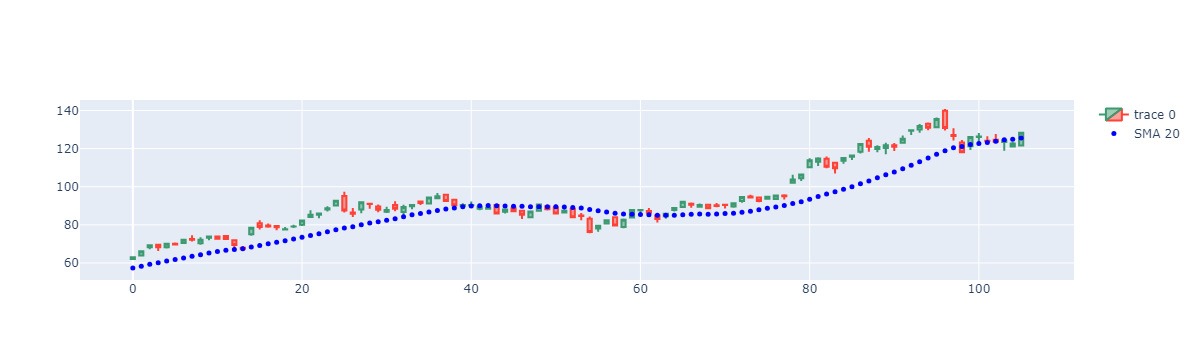

In [76]:
# Importar la librería plotly.graph_objects como go para la visualización de datos
import plotly.graph_objects as go

# Crear una copia del DataFrame 'datos' para trabajar con ella
dfplt = datos[:]

# Crear una figura utilizando plotly, específicamente un gráfico de velas (Candlestick)
# Esto es útil para visualizar movimientos de precios en datos financieros
figura = go.Figure(data=[go.Candlestick(x=datos.index,
                                        open=datos["Open"],  # Precios de apertura
                                        high=datos["High"],  # Precios máximos
                                        low=datos["Low"],    # Precios mínimos
                                        close=datos["Close"] # Precios de cierre
                                       )])

# Añadir a la figura un gráfico de dispersión para la SMA de 20 periodos
# Esto se hace para visualizar cómo se compara la SMA con los precios reales
figura.add_scatter(x=dfplt.index, y=dfplt["sma_20"], mode='markers', 
                   marker=dict(color='blue', size=5), name='SMA 20')

# Actualizar la configuración de la figura para ocultar el control deslizante del eje X
# Esto mejora la visualización al no sobrecargar la interfaz con controles innecesarios
figura.update_layout(xaxis_rangeslider_visible=False)

# Mostrar la figura. Esto generará el gráfico en el entorno de Jupyter Notebook o en una ventana de navegador web
figura.show()

In [77]:
datos['SMA_10'] = calculo_sma(datos,10)
datos['SMA_20'] = calculo_sma(datos,20)
datos['SMA_30'] = calculo_sma(datos,30)



In [78]:
datos

,Open,High,Low,Close,Adj Close,Volume,sma_20,pendiente,SMA_10,SMA_20,SMA_30
0,62.099998,63.191002,61.650002,63.027000,63.018867,369146000,57.43665,0.000000,NaN,NaN,NaN
1,63.973999,66.599998,63.689999,66.160004,66.151466,476578000,58.34475,0.000000,NaN,NaN,NaN
2,68.224998,69.497002,67.205002,69.332001,69.323059,680078000,59.35650,0.000000,NaN,NaN,NaN
3,69.629997,69.753998,66.300003,68.223000,68.214203,683111000,60.15500,0.000000,NaN,NaN,NaN
4,68.319000,70.220001,67.599998,70.098999,70.089951,495575000,61.00295,1.556994,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
101,124.099998,126.410004,122.919998,123.989998,123.989998,252571700,123.18930,0.595102,127.999,123.18930,115.645467
102,124.580002,127.709999,122.750000,123.540001,123.540001,315516700,123.84130,0.537932,127.392,123.84130,116.609133
103,123.470001,124.839996,118.830002,124.300003,124.300003,284885500,124.57465,0.495254,126.634,124.57465,117.607167
104,121.129997,123.410004,121.029999,122.669998,122.669998,218374000,124.95815,0.475801,125.803,124.95815,118.613534


In [79]:

def determinar_tendencia(datos):
    if datos['SMA_10'] > datos['SMA_20'] and datos['SMA_20'] > datos['SMA_30']:
        return 'Alcista'
    elif datos['SMA_10'] < datos['SMA_20'] and datos['SMA_20'] < datos['SMA_30']:
        return 'Bajista'
    else:
        return 'Neutro'
   
   #determinar la tendencia y agregar esa columna la dataframe
   
datos['Tendencia'] = datos.apply(determinar_tendencia, axis=1)

In [80]:
datos

,Open,High,Low,Close,Adj Close,Volume,sma_20,pendiente,SMA_10,SMA_20,SMA_30,Tendencia
0,62.099998,63.191002,61.650002,63.027000,63.018867,369146000,57.43665,0.000000,NaN,NaN,NaN,Neutro
1,63.973999,66.599998,63.689999,66.160004,66.151466,476578000,58.34475,0.000000,NaN,NaN,NaN,Neutro
2,68.224998,69.497002,67.205002,69.332001,69.323059,680078000,59.35650,0.000000,NaN,NaN,NaN,Neutro
3,69.629997,69.753998,66.300003,68.223000,68.214203,683111000,60.15500,0.000000,NaN,NaN,NaN,Neutro
4,68.319000,70.220001,67.599998,70.098999,70.089951,495575000,61.00295,1.556994,NaN,NaN,NaN,Neutro
...,...,...,...,...,...,...,...,...,...,...,...,...
101,124.099998,126.410004,122.919998,123.989998,123.989998,252571700,123.18930,0.595102,127.999,123.18930,115.645467,Alcista
102,124.580002,127.709999,122.750000,123.540001,123.540001,315516700,123.84130,0.537932,127.392,123.84130,116.609133,Alcista
103,123.470001,124.839996,118.830002,124.300003,124.300003,284885500,124.57465,0.495254,126.634,124.57465,117.607167,Alcista
104,121.129997,123.410004,121.029999,122.669998,122.669998,218374000,124.95815,0.475801,125.803,124.95815,118.613534,Alcista


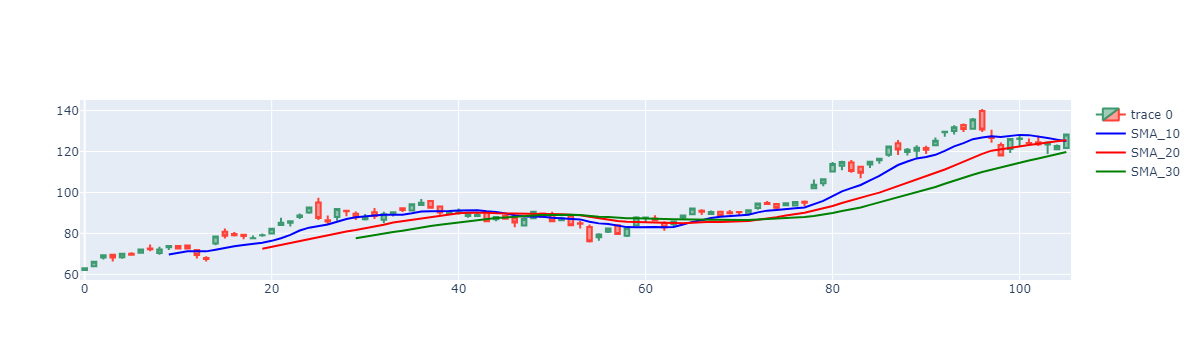

In [81]:
dfplt = datos[:]

figura = go.Figure(data=[go.Candlestick(x=datos.index,
                                        open=datos["Open"],
                                        high=datos["High"],
                                        low=datos["Low"],
                                        close=datos["Close"])])

#agregar SMA de 10, 20 y 30 periodos al gráfico

figura.add_scatter(x=dfplt.index, y=dfplt["SMA_10"], mode='lines', line=dict(color='blue'), name='SMA_10')
figura.add_scatter(x=dfplt.index, y=dfplt["SMA_20"], mode='lines', line=dict(color='red'), name='SMA_20')
figura.add_scatter(x=dfplt.index, y=dfplt["SMA_30"], mode='lines', line=dict(color='green'), name='SMA_30')

figura.update_layout(xaxis_rangeslider_visible=False)
figura.show()



In [93]:
# Esta función revisa las tendencias de las velas en relación a una media móvil y clasifica cada vela en categorías
def revisar_velas(datos, backcanles, ma_column):
    # Inicializa una lista de categorías con ceros para los primeros 'backcanles' elementos
    categorias = [0 for _ in range(backcanles)]
    
    # Itera sobre el DataFrame desde 'backcanles' hasta el final del conjunto de datos
    for i in range(backcanles, len(datos)):
        # Si todas las velas de cierre en el rango especificado están por encima de la media móvil, añade 'Alcista'
        if all(datos['Close'][i-backcanles:i] > datos[ma_column][i-backcanles:i]):
            categorias.append('Alcista')
        # Si todas las velas de cierre en el rango especificado están por debajo de la media móvil, añade 'Bajista'
        elif all(datos['Close'][i-backcanles:i] < datos[ma_column][i-backcanles:i]):
            categorias.append('Bajista')
        # Si ninguna de las condiciones anteriores se cumple, añade 'Neutro'
        else:
            categorias.append('Neutro')
    
    # Retorna la lista de categorías
    return categorias

# Aplica la función 'revisar_velas' al DataFrame 'datos' y almacena el resultado en una nueva columna llamada 'tendencia'
datos['tendencia_velas'] = revisar_velas(datos, 3, 'SMA_20')

In [103]:
datos ['categorias']= revisar_velas(datos, 5, 'VWAP_D')

KeyError: 'VWAP_D'

In [94]:
#calcular ADX
datos.ta.adx(append=True)
datos.ta.dm(append=True)

,DMP_14,DMN_14
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
101,1.716792,0.816398
102,1.687005,0.758053
103,1.566447,0.984016
104,1.454507,0.913698


In [95]:
datos[30:70] 

,Open,High,Low,Close,Adj Close,Volume,sma_20,pendiente,SMA_10,SMA_20,SMA_30,Tendencia,tendencia_velas,ADX,DMP,DMN,tendencia_adx,ADX_14,DMP_14,DMN_14
30,86.930000,89.545998,86.257004,87.836998,87.829781,642086000,82.409650,1.063557,88.445399,82.409650,78.490500,Alcista,Alcista,55.917646,1.622823,0.528679,Alcista,55.917646,1.622823,0.528679
31,90.388000,92.404999,87.084999,88.455002,88.447739,668976000,83.201750,0.980328,88.767200,83.201750,79.233667,Alcista,Alcista,55.916804,1.720990,0.486696,Alcista,55.916804,1.720990,0.486696
32,86.699997,90.543999,85.010002,89.398003,89.390663,672171000,84.199050,0.994725,89.110600,84.199050,79.902533,Alcista,Alcista,54.819210,1.585406,0.611826,Alcista,54.819210,1.585406,0.611826
33,89.796997,90.410004,88.223000,90.372002,90.364578,479063000,85.344050,1.123824,89.277801,85.344050,80.640834,Alcista,Alcista,53.847872,1.461416,0.563977,Alcista,53.847872,1.461416,0.563977
34,92.300003,92.648003,90.404999,91.434998,91.427490,480372000,85.988900,1.128606,89.154401,85.988900,81.352033,Alcista,Alcista,53.413644,1.521741,0.520167,Alcista,53.413644,1.521741,0.520167
35,91.140999,94.778000,90.834000,94.289001,94.281258,586719000,86.762500,1.071053,89.830501,86.762500,82.173634,Alcista,Alcista,53.389352,1.568697,0.480011,Alcista,53.389352,1.568697,0.480011
36,93.941002,96.765999,93.510002,95.001999,94.994194,552136000,87.558000,0.966323,90.753300,87.558000,82.935933,Alcista,Alcista,53.673005,1.600881,0.443167,Alcista,53.673005,1.600881,0.443167
37,95.850998,96.375000,92.501999,92.560997,92.553398,513648000,88.251000,0.865087,90.818100,88.251000,83.613033,Alcista,Alcista,53.400597,1.478656,0.486292,Alcista,53.400597,1.478656,0.486292
38,93.112000,93.239998,89.123001,90.250000,90.242584,586067000,88.880350,0.845621,90.754300,88.880350,84.217100,Alcista,Alcista,51.575798,1.366315,0.706065,Alcista,51.575798,1.366315,0.706065
39,90.000000,91.300003,89.193001,90.356003,90.348579,435212000,89.442550,0.770200,90.995500,89.442550,84.765633,Alcista,Alcista,49.927478,1.262980,0.652664,Alcista,49.927478,1.262980,0.652664


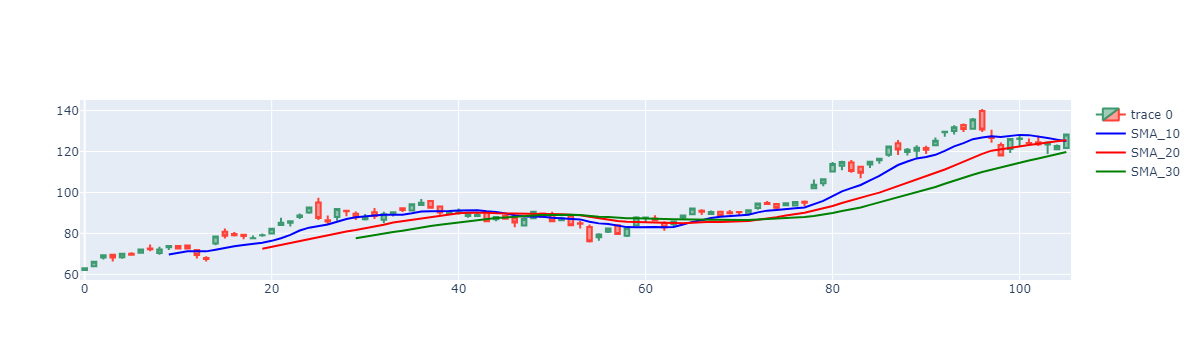

In [96]:

dfplt = datos[:]

figura = go.Figure(data=[go.Candlestick(x=datos.index,
                                        open=datos["Open"],
                                        high=datos["High"],
                                        low=datos["Low"],
                                        close=datos["Close"])])
# Agrega las medias móviles al gráfico
figura.add_scatter(x=dfplt.index, y=dfplt["SMA_10"], mode='lines', line=dict(color='blue'), name='SMA_10')
figura.add_scatter(x=dfplt.index, y=dfplt["SMA_20"], mode='lines', line=dict(color='red'), name='SMA_20')
figura.add_scatter(x=dfplt.index, y=dfplt["SMA_30"], mode='lines', line=dict(color='green'), name='SMA_30')

figura.update_layout(xaxis_rangeslider_visible=False)
figura.show()


In [97]:
# funcion para se;al de tendencia con ADX
def senal_tendencia(datos, threshold = 40):
    tendencias = []
    for i in range(len(datos)):
        if datos['ADX'][i] > threshold :
            if datos['DMP'][i] > datos['DMN'][i]:
                tendencias.append('Alcista')
            else:
                tendencias.append('Bajista')
        else:
            tendencias.append('Neutro')

    return tendencias
    

In [98]:
print(datos.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'sma_20',
       'pendiente', 'SMA_10', 'SMA_20', 'SMA_30', 'Tendencia',
       'tendencia_velas', 'ADX', 'DMP', 'DMN', 'tendencia_adx', 'ADX_14',
       'DMP_14', 'DMN_14'],
      dtype='object')


In [99]:
datos = datos.rename(columns=lambda x: x[:-3] if x.startswith('ADX') else x)
datos = datos.rename(columns=lambda x: x[:-3] if x.startswith('DM') else x)

datos['tendencia_adx'] = senal_tendencia(datos)

In [100]:
datos[datos['tendencia_adx'] != 'Neutro']


,Open,High,Low,Close,Adj Close,Volume,sma_20,pendiente,SMA_10,SMA_20,SMA_30,Tendencia,tendencia_velas,,,,tendencia_adx,ADX,DMP,DMN
27,88.049004,91.959999,86.150002,91.913002,91.905449,668075000,80.010500,1.173012,85.683900,80.010500,NaN,Neutro,Alcista,56.136934,2.090040,0.469725,Alcista,56.136934,2.090040,0.469725
28,91.055000,91.503998,88.434998,90.888000,90.880539,635713000,80.948500,1.118206,87.006400,80.948500,NaN,Neutro,Alcista,56.899414,1.919317,0.431356,Alcista,56.899414,1.919317,0.431356
29,89.577003,90.646004,86.599998,87.944000,87.936775,602318000,81.650700,1.089058,87.889600,81.650700,77.663500,Alcista,Alcista,56.478415,1.764130,0.544847,Alcista,56.478415,1.764130,0.544847
30,86.930000,89.545998,86.257004,87.836998,87.829781,642086000,82.409650,1.063557,88.445399,82.409650,78.490500,Alcista,Alcista,55.917646,1.622823,0.528679,Alcista,55.917646,1.622823,0.528679
31,90.388000,92.404999,87.084999,88.455002,88.447739,668976000,83.201750,0.980328,88.767200,83.201750,79.233667,Alcista,Alcista,55.916804,1.720990,0.486696,Alcista,55.916804,1.720990,0.486696
32,86.699997,90.543999,85.010002,89.398003,89.390663,672171000,84.199050,0.994725,89.110600,84.199050,79.902533,Alcista,Alcista,54.819210,1.585406,0.611826,Alcista,54.819210,1.585406,0.611826
33,89.796997,90.410004,88.223000,90.372002,90.364578,479063000,85.344050,1.123824,89.277801,85.344050,80.640834,Alcista,Alcista,53.847872,1.461416,0.563977,Alcista,53.847872,1.461416,0.563977
34,92.300003,92.648003,90.404999,91.434998,91.427490,480372000,85.988900,1.128606,89.154401,85.988900,81.352033,Alcista,Alcista,53.413644,1.521741,0.520167,Alcista,53.413644,1.521741,0.520167
35,91.140999,94.778000,90.834000,94.289001,94.281258,586719000,86.762500,1.071053,89.830501,86.762500,82.173634,Alcista,Alcista,53.389352,1.568697,0.480011,Alcista,53.389352,1.568697,0.480011
36,93.941002,96.765999,93.510002,95.001999,94.994194,552136000,87.558000,0.966323,90.753300,87.558000,82.935933,Alcista,Alcista,53.673005,1.600881,0.443167,Alcista,53.673005,1.600881,0.443167


In [101]:
datos['confirmacion_senal'] = datos.apply(lambda row: row['categorias'] if row ['categorias']== row['tendencia_adx'] else 'Neutro', axis=1)


KeyError: 'categorias'

In [102]:
datos[datos['confirmacion_senal'] != 'Neutro']

KeyError: 'confirmacion_senal'